In [269]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score

In [234]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [235]:
df.head(n=10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [237]:
X=df.drop("price",axis=1)
y=df.price

In [238]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [239]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [240]:
X.describe()

,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.693578
std,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,3.000000


In [273]:
numerical=[coulmn for coulmn in X.columns if X[coulmn].dtype!="object"]
categorical=[coulmn for coulmn in X.columns if X[coulmn].dtype=="object"]
X_numerical=X[numerical]
X_categorical=X[categorical]
all=numerical+categorical
all.remove("area")

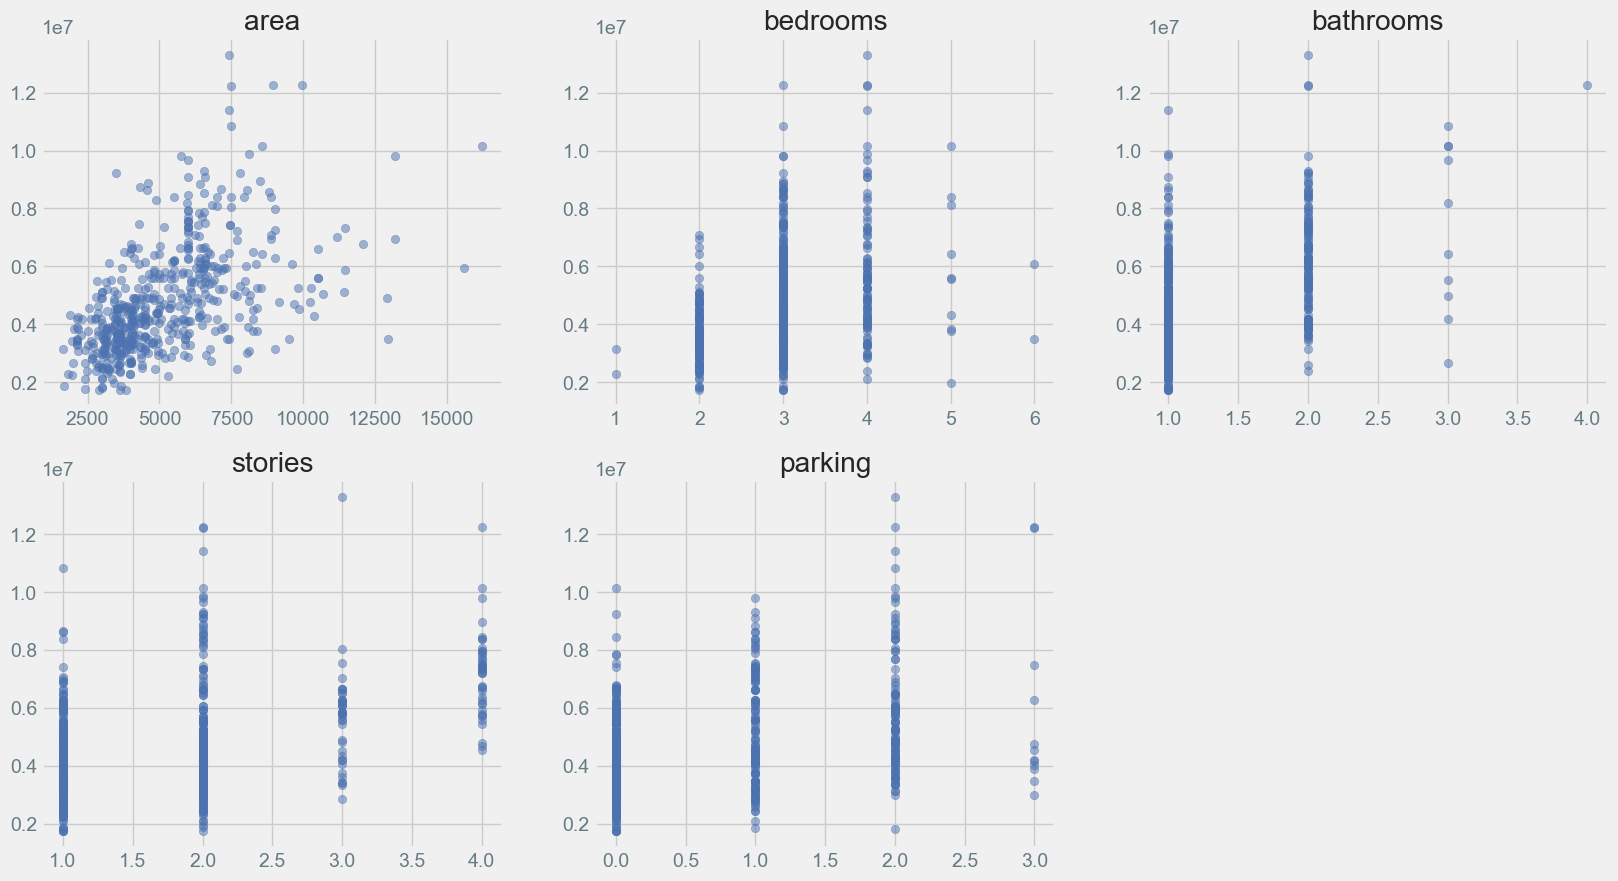

In [242]:
fig,axis=plt.subplots(2,3,figsize=(18,10))
for i ,ax in enumerate(axis.ravel()):
    if (i>len(numerical)-1):
        ax.axis('off')
        continue
    X_col=X_numerical.iloc[:,i]
    ax.scatter(X_col,y,alpha=.5)
    ax.set_title(numerical[i])

In [243]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

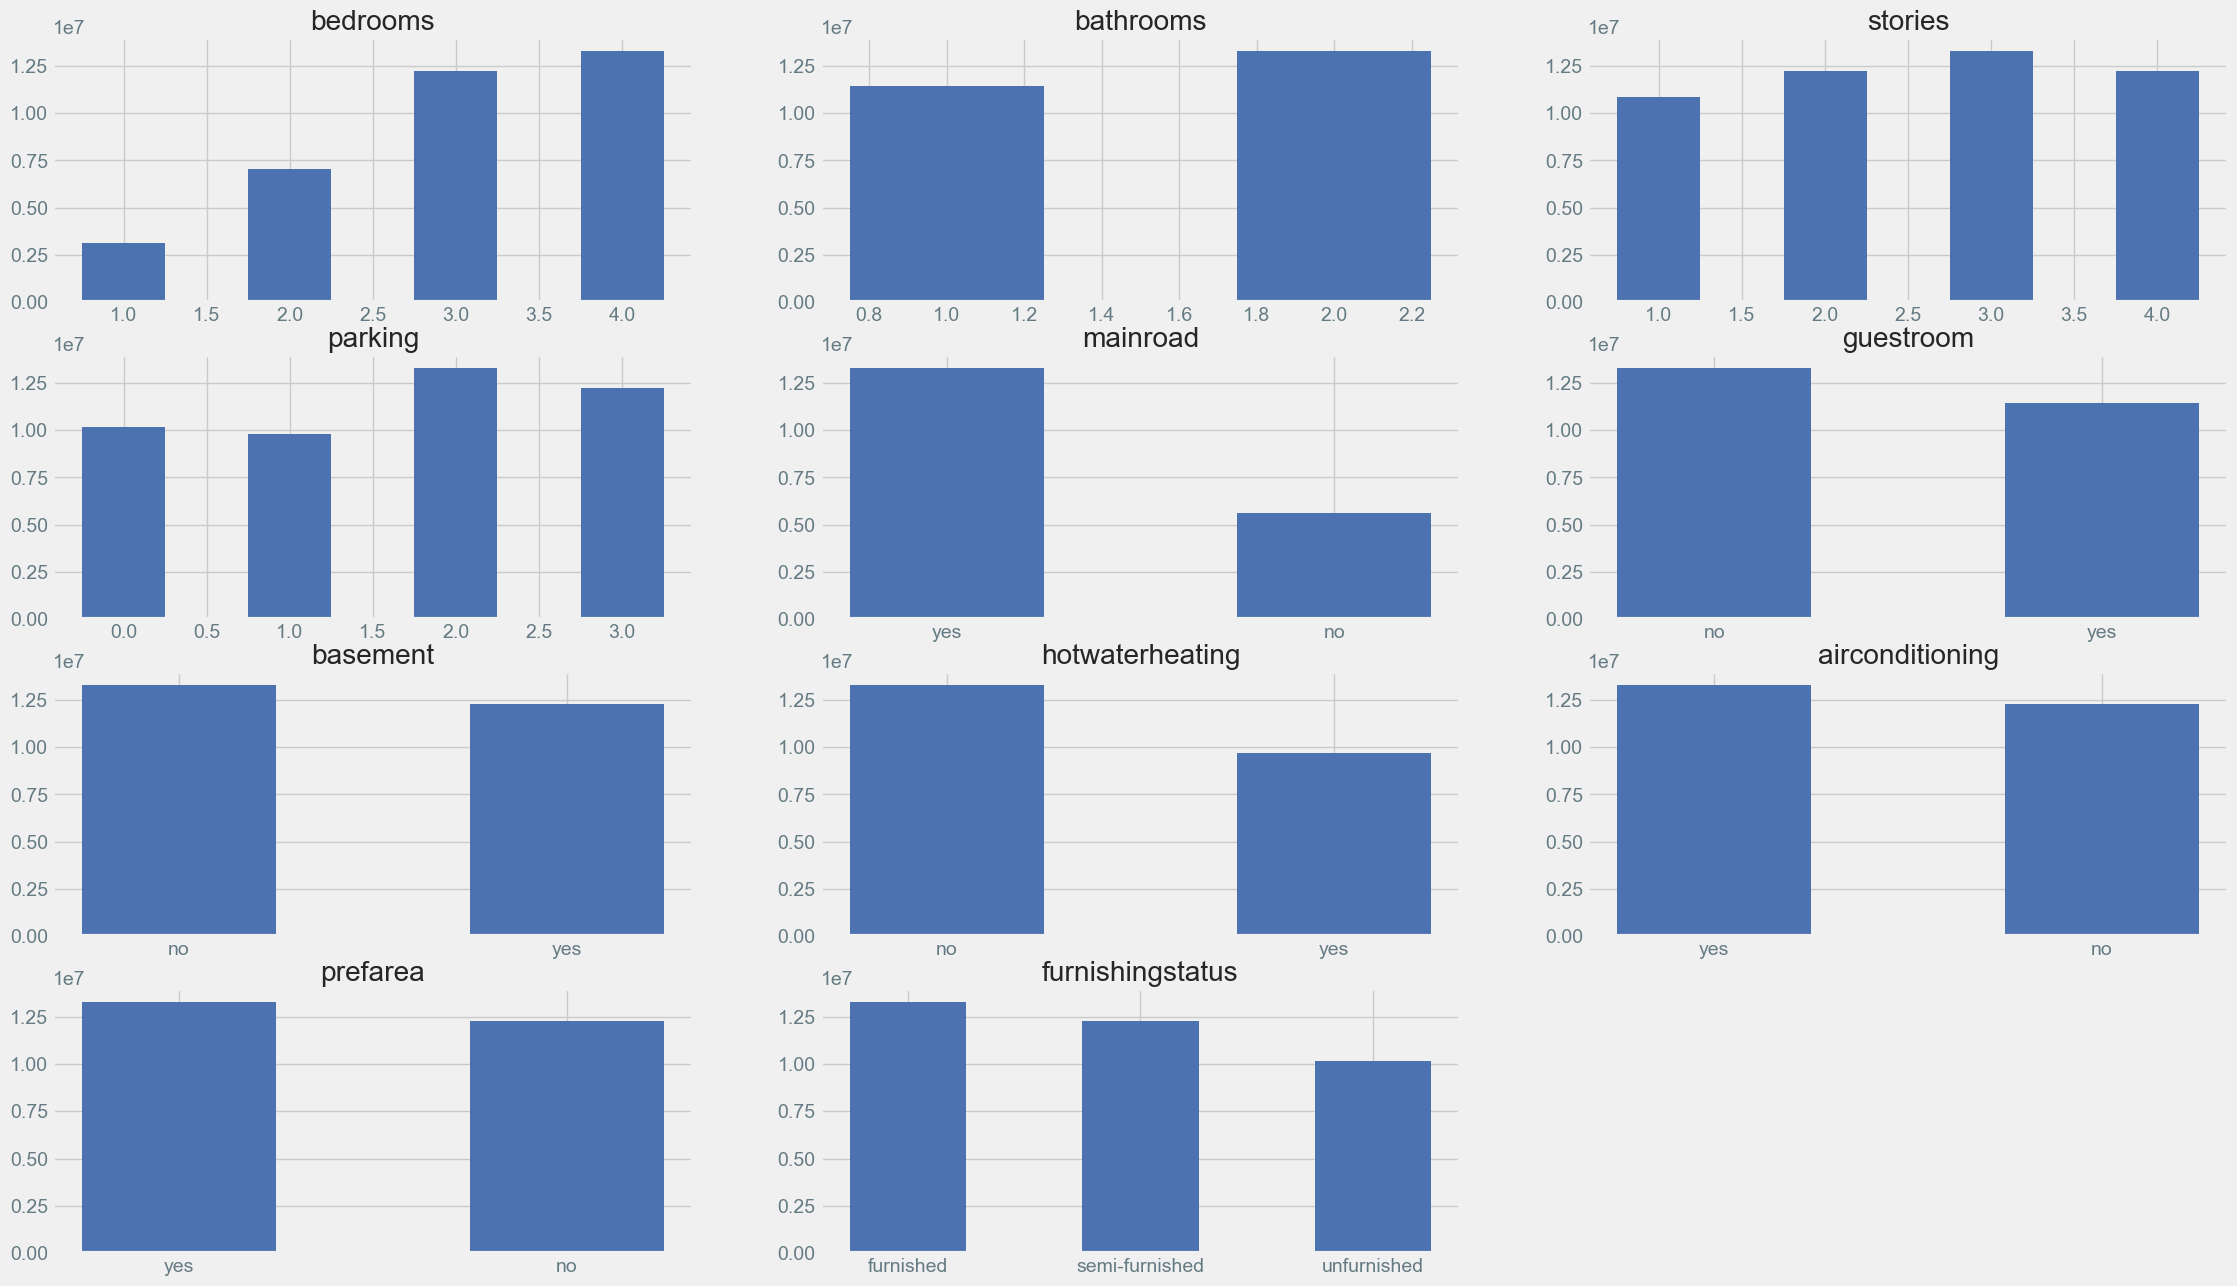

In [275]:
plt.style.use( 'seaborn-v0_8-deep')

fig,axis=plt.subplots(4,3,figsize=(25,15))
for i ,ax in enumerate(axis.ravel()):
    if (i>=len(all)):
        ax.axis("off")
        continue
    ax.bar(X[all[i]],y,width=.5)
    ax.set_title(all[i])

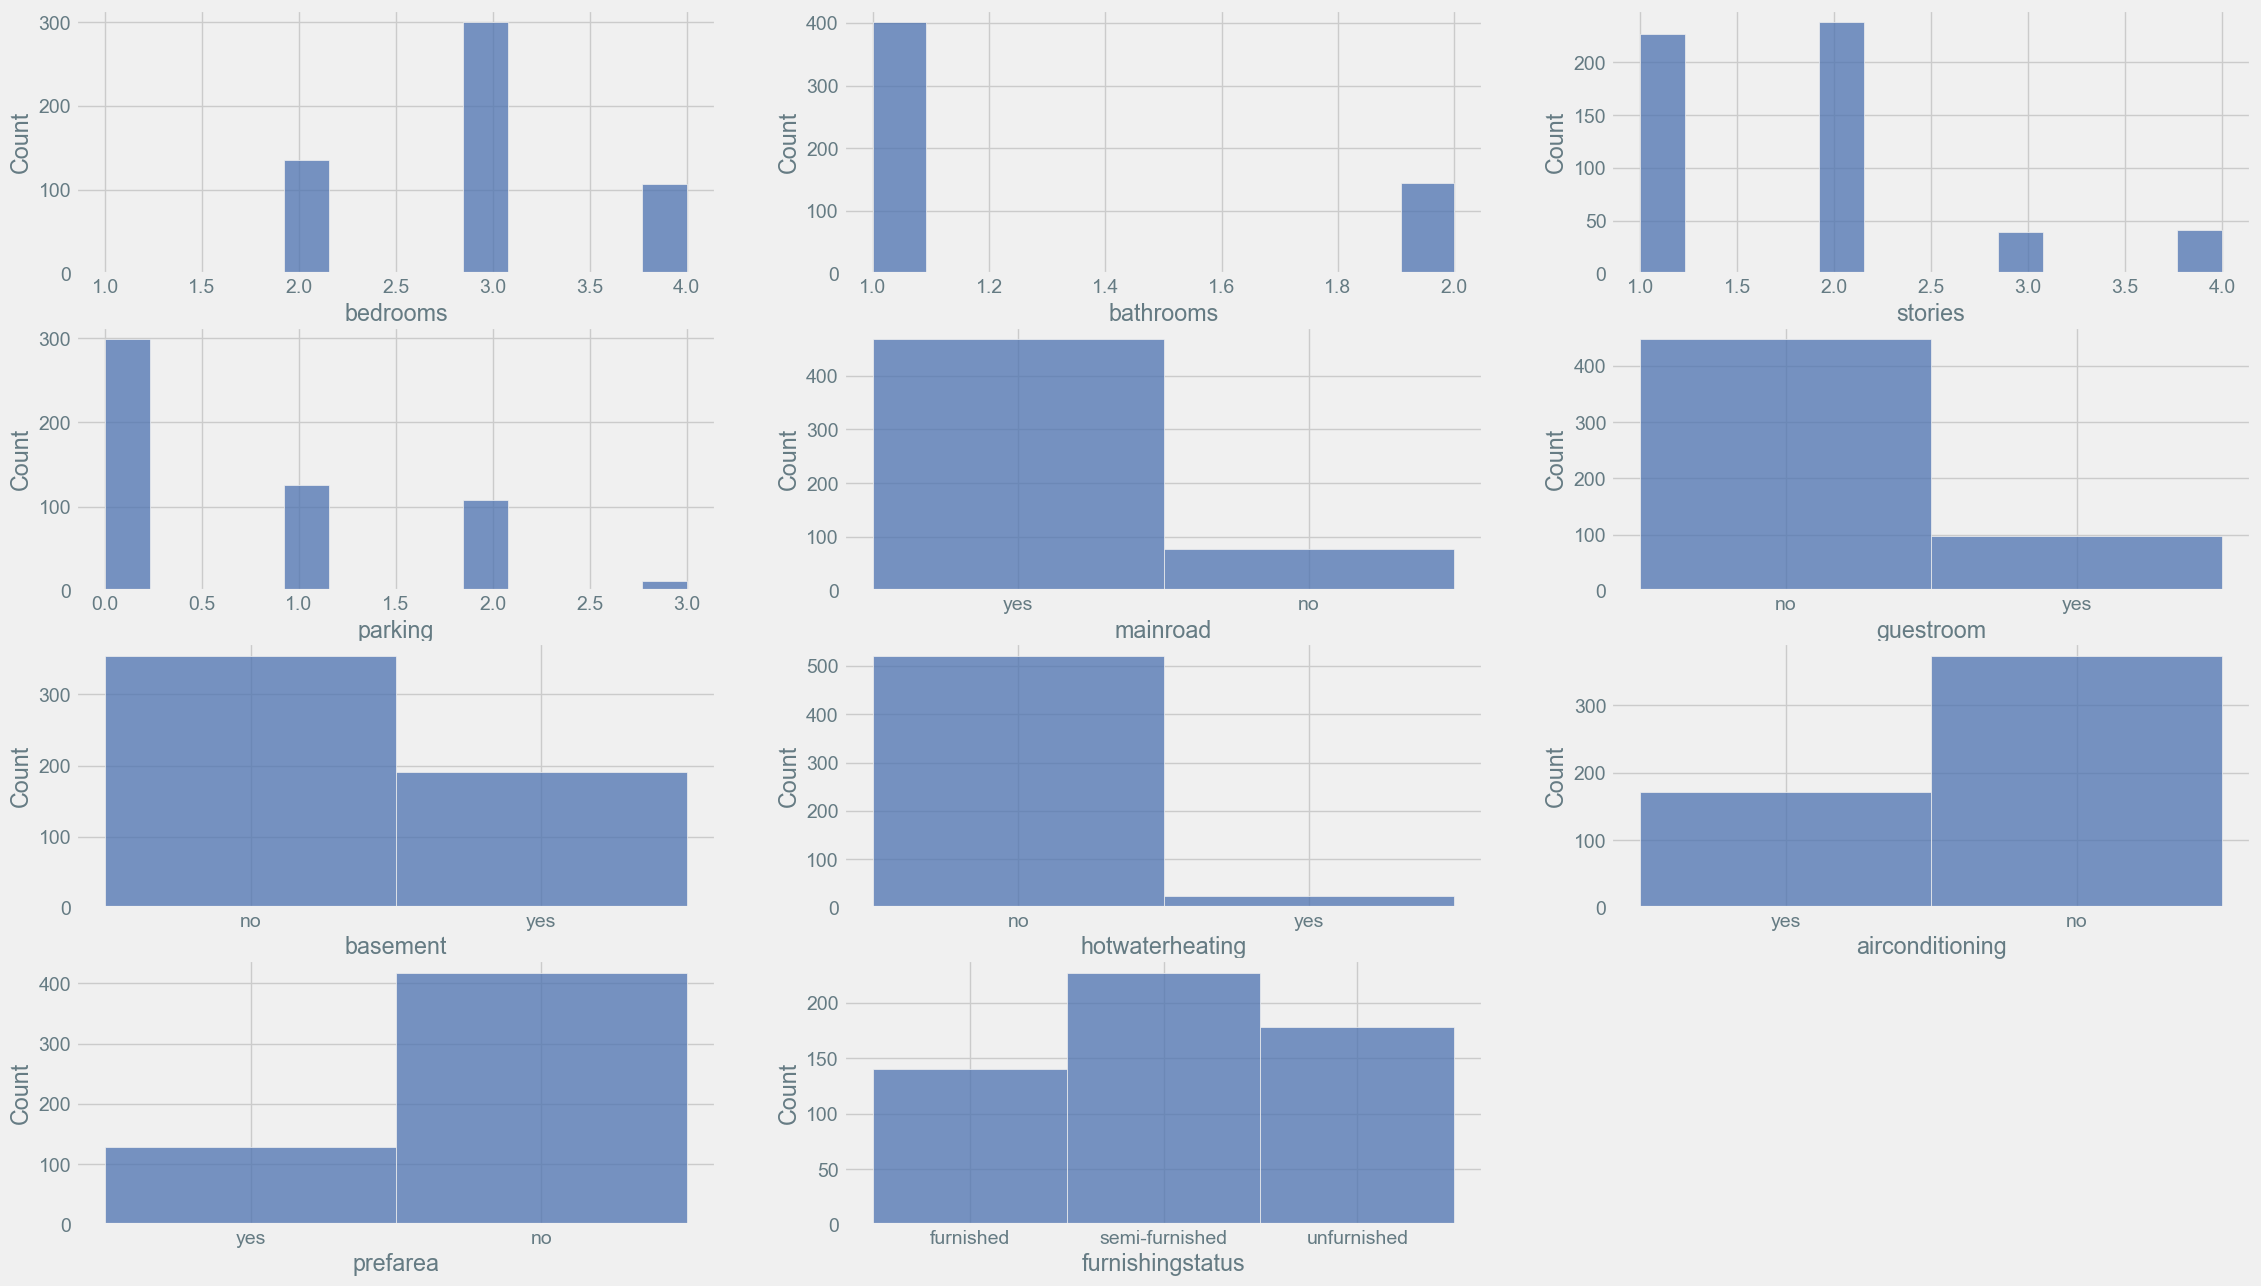

In [272]:
plt.style.use( 'seaborn-v0_8-deep')

fig,axis=plt.subplots(4,3,figsize=(25,15))
for i ,ax in enumerate(axis.ravel()):
    if (i>=len(all)):
        ax.axis("off")
        continue
    
    X_col=X.iloc[:,i]
    sns.histplot(X[all[i]],ax=ax)


<Axes: ylabel='area'>

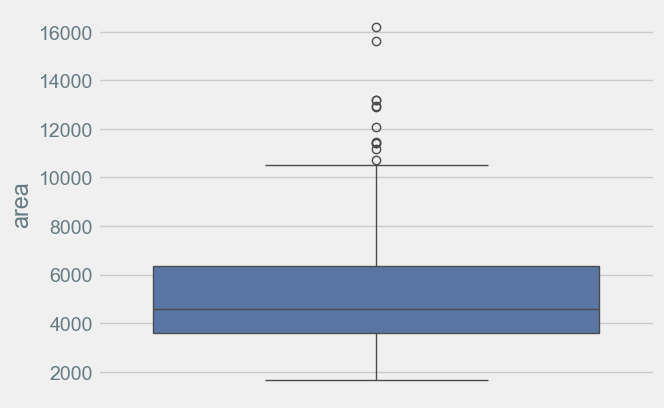

In [245]:
sns.boxplot(X["area"])

In [246]:
out1=X['area']>10000
out1.sum()

18

Handle outlier

In [247]:
X["area"]=np.where(X["area"]>=12000,12000,X['area'])


In [248]:
X["bathrooms"].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [249]:
X["bathrooms"]=np.where(X["bathrooms"]>=2,2,X['bathrooms'])



In [250]:
X["bedrooms"]=np.where(X["bedrooms"]>=4,4,X['bedrooms'])


In [251]:
import seaborn as sns

In [252]:
for i in X.columns:
    if i!='area':
        print(X[i].value_counts())

bedrooms
3    300
2    136
4    107
1      2
Name: count, dtype: int64
bathrooms
1    401
2    144
Name: count, dtype: int64
stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64
mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [253]:
X["bedrooms"]=np.where(X["bedrooms"]>=5,5,X['bedrooms'])



In [254]:
X_numerical=X[numerical]
X_categorical=X[categorical]

In [255]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

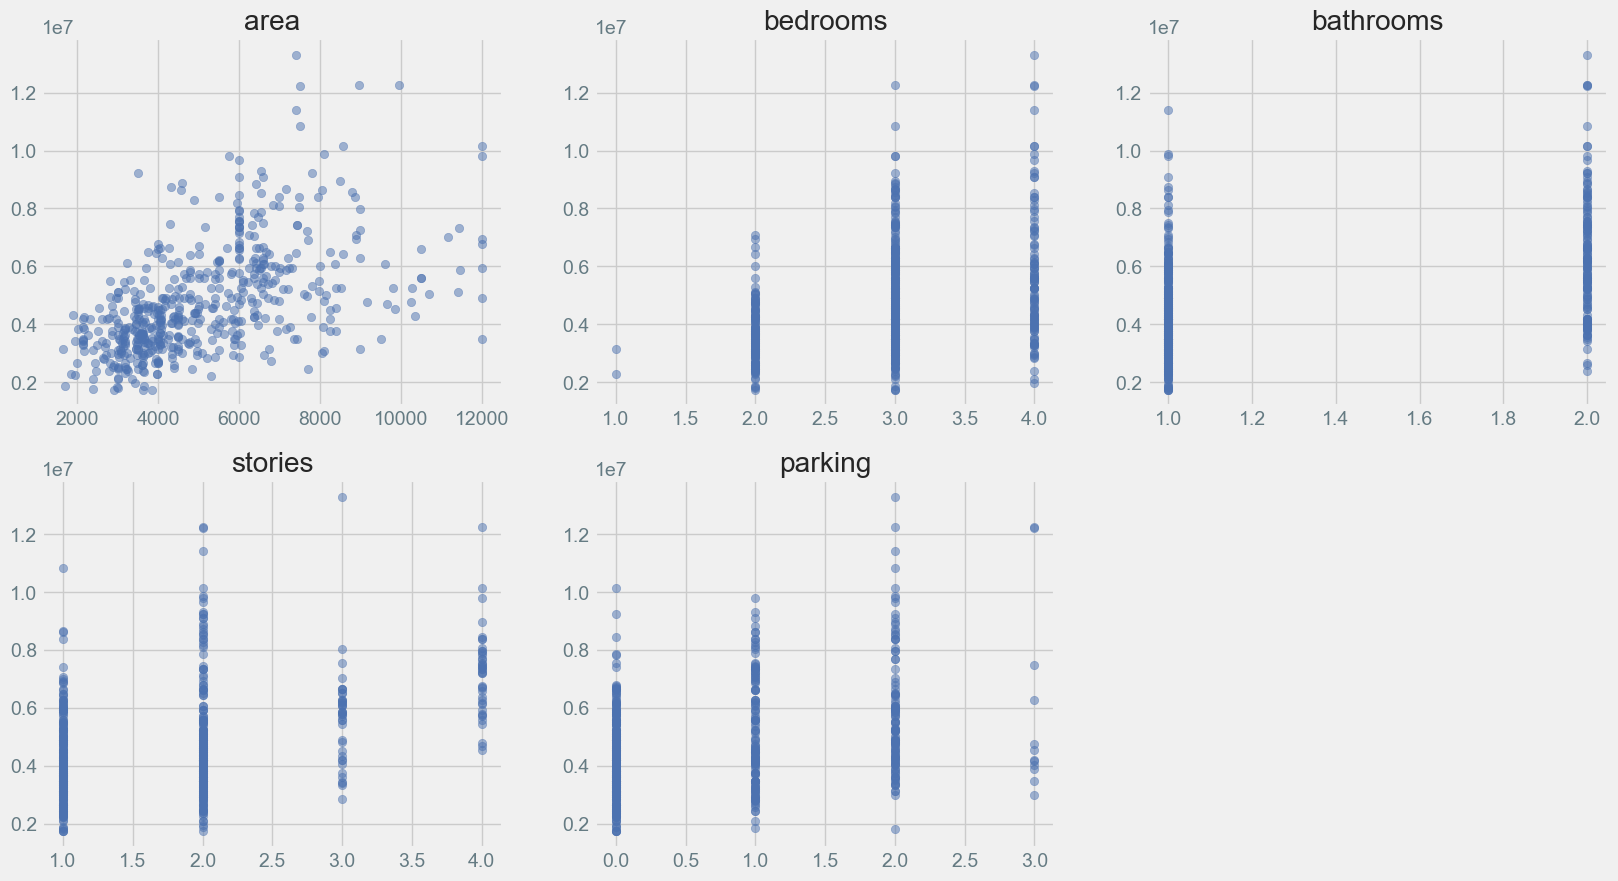

In [256]:
fig,axis=plt.subplots(2,3,figsize=(18,10))
for i ,ax in enumerate(axis.ravel()):
    if (i>len(numerical)-1):
        ax.axis('off')
        continue
    X_col=X_numerical.iloc[:,i]
    ax.scatter(X_col,y,alpha=.5)
    ax.set_title(numerical[i])

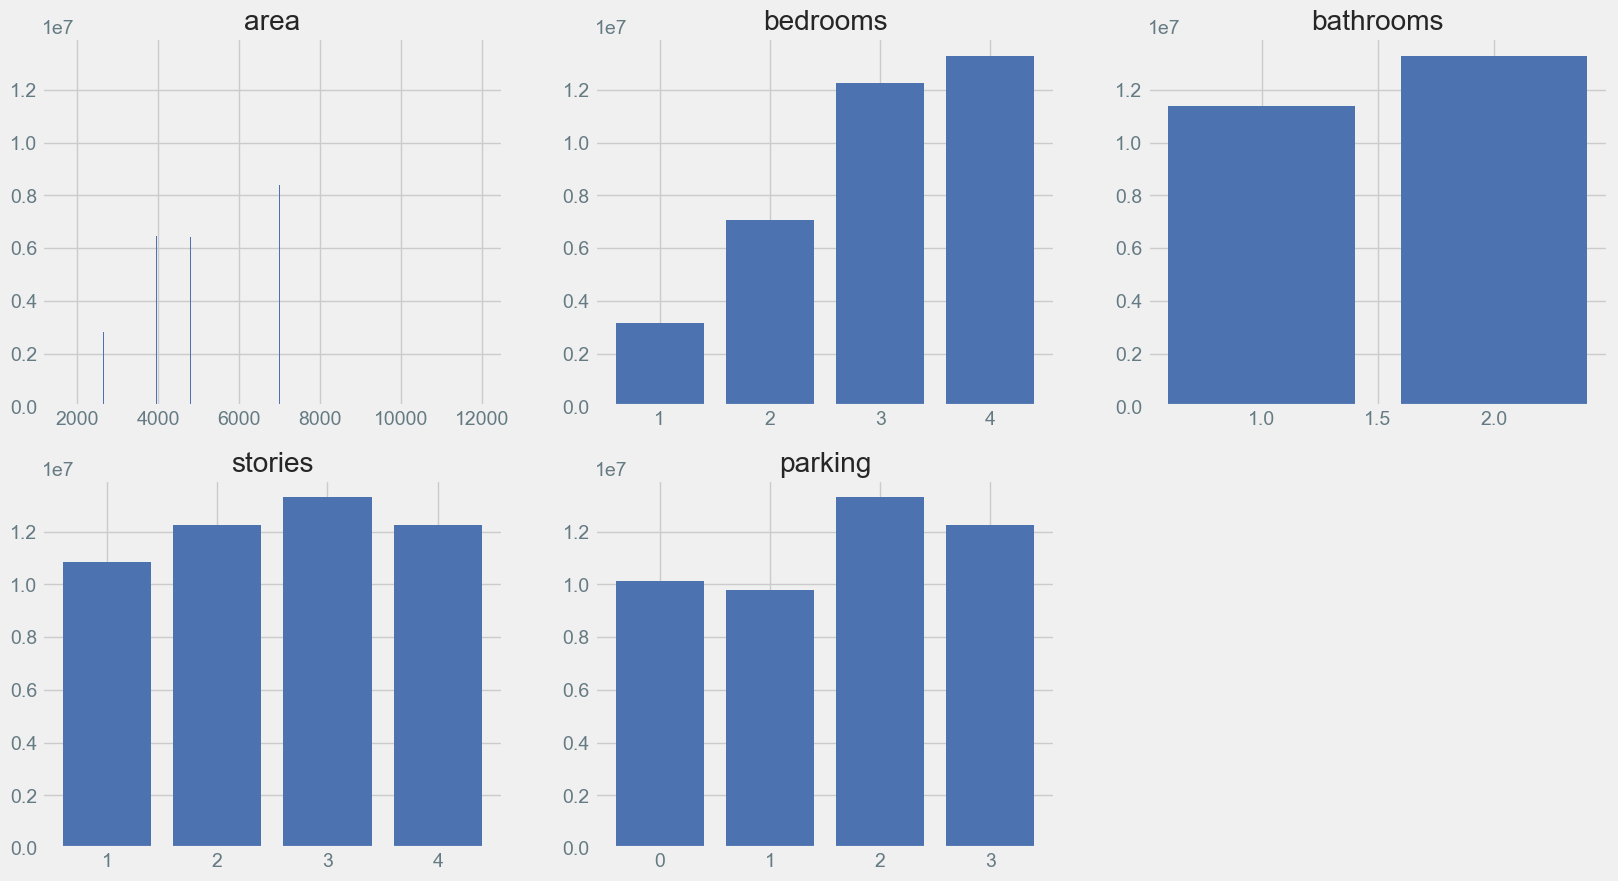

In [257]:
fig,axis=plt.subplots(2,3,figsize=(18,10))
for i ,ax in enumerate(axis.ravel()):
    if (i>len(numerical)-1):
        ax.axis('off')
        continue
    X_col=X_numerical.iloc[:,i]
    ax.bar(X_col,y)
    ax.set_title(numerical[i])

In [279]:
alldata=X
alldata["price"]=y

<Axes: >

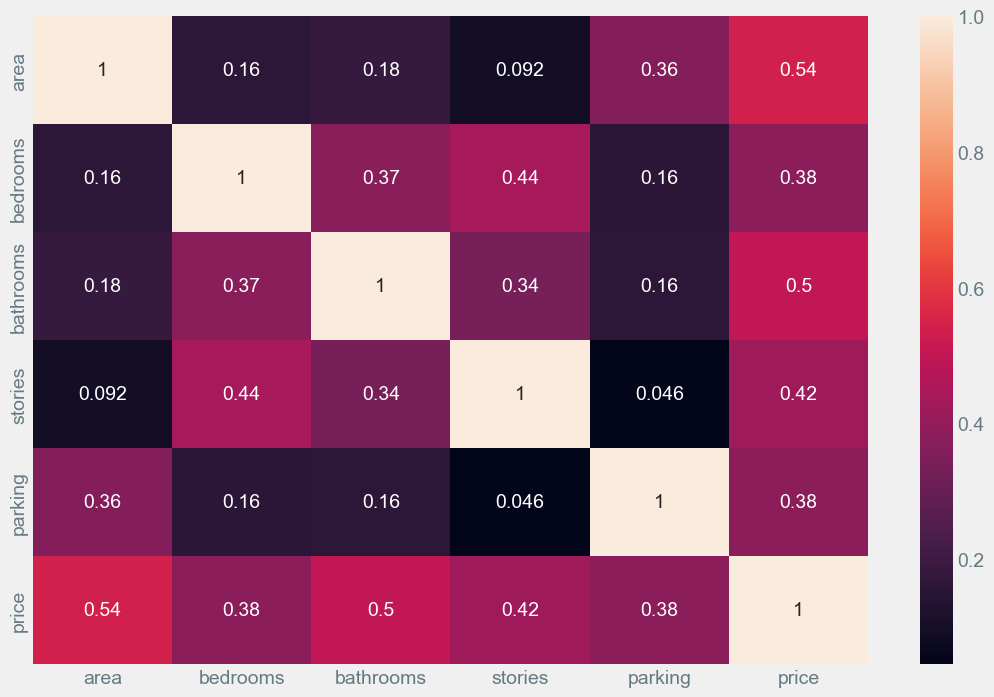

In [282]:
corr=alldata.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

In [289]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(
    hierarchy.ward(corr),no_plot=True)['ivl'], dtype="int")
sns.heatmap(order,annot=True)


IndexError: Inconsistent shape between the condition and the input (got (6, 1) and (6,))

In [283]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [260]:
transformation1=ColumnTransformer([('num',StandardScaler(),numerical),
                                    ('cat',OneHotEncoder(),categorical)
                                  ])
transformation2=ColumnTransformer([
                                    ('cat',OneHotEncoder(),categorical)
                                  ])

In [261]:

X_scaled=transformation1.fit_transform(X_train)
X_not_scaled=transformation2.fit_transform(X_train)

In [262]:
pd.DataFrame(X_scaled)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.616078,0.040671,1.641620,2.466743,-0.780798,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.107067,-1.437032,-0.609154,-0.936738,0.373195,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.715182,-1.437032,-0.609154,-0.936738,-0.780798,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-1.092046,-1.437032,-0.609154,0.197756,-0.780798,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.822858,1.518374,1.641620,0.197756,-0.780798,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.616078,0.040671,-0.609154,-0.936738,1.527187,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
432,-0.955005,0.040671,1.641620,-0.936738,-0.780798,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
433,-0.793492,0.040671,-0.609154,-0.936738,-0.780798,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
434,-0.749443,0.040671,-0.609154,0.197756,-0.780798,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [263]:
from sklearn.linear_model import LinearRegression
from sklearn .svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [264]:
pipe1=make_pipeline(transformation1,LinearRegression())
pipe2=make_pipeline(transformation2,LinearRegression())
print(np.mean(cross_val_score(pipe1,X_train,y_train)))
print(np.mean(cross_val_score(pipe2,X_train,y_train)))



0.6638954508479822
0.4231042745504129


In [265]:
pipe3=make_pipeline(transformation1,SVR())
pipe4=make_pipeline(transformation2,SVR())
print(np.mean(cross_val_score(pipe3,X_train,y_train)))
print(np.mean(cross_val_score(pipe4,X_train,y_train)))

-0.0614427286906384
-0.06144769956656142


In [266]:
from sklearn.model_selection import GridSearchCV
